Project and Final Report Created by: Kayla Brock, Lincoln Muriithi, Paige Rackley, Greg Maggard | July 13, 2022

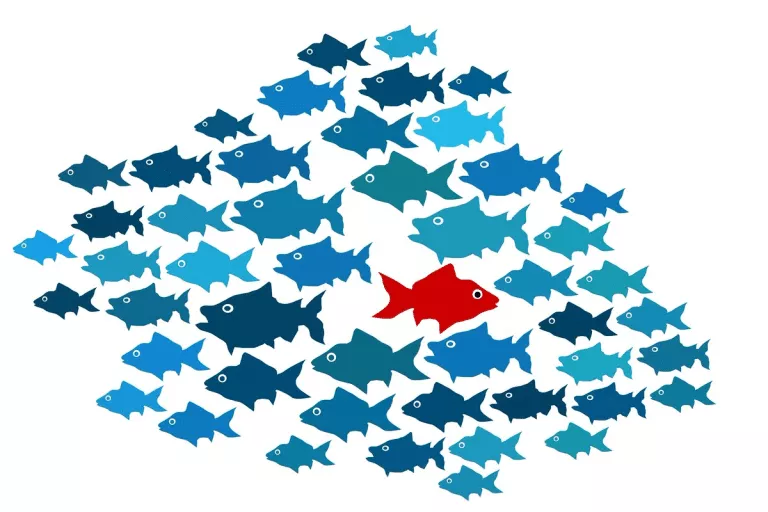

In [1]:
import pandas as pd
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from acquire import get_db_log_data

### Project Description

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

This project notebook was put together to deliver on the following request:

_Hello!_

_I have some questions for you that I need to be answered before the board meeting Thursday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well._

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?




### Project Goal 

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

Our project goal is to deliver on at least five of these questions with supporting evidence by the deadline so that our representative will have all of the information necessary for the board meeting. 

### Initial Questions

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

7. Which lessons are least accessed?

8. Anything else I should be aware of?

### Executive Summary

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

_1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?_
- Full Stack Java: 'toc'
- Data Science: 'fundamentals/intro to data science' & 'classification overview'
- Full Stack PHP: 'html/css'
- Front End Programming: 'html/css'

_2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?_
- Full Stack Java: 
_While the majority of cohorts seemed to reference 'javascript-i', 'toc', 'html-css', and 'java iii' the most, other lessons made it in the 'top five most frequented' for certain cohorts. Voyageur and Hyperion visited java ii. Teddy, Andromeda, and Yosemite visited 'spring.' Beteleguese, Xanadu, and Kalypso visited 'jquery.' Teddy visited 'mysql'. Marco, Neptune, and Oberon visited 'javascript-i/introduction/working-with-data-types-operators-and-variables.' Oberon, unlike all other cohorts, have specific pages as their top five most visited. This might suggest that their instructor paid close attention to help them bookmark lessons they would need to refer back to in their time at CodeUp._
- Data Science: 
_While most of the data science cohorts focused on classification and fundamentals, Cohort Curie had 'Regression' as their top lesson most searched._
- Full Stack PHP: 
_Full stack PHP was the most diverse in terms of searches their cohort favored. Cohort Kings frequented content/laravel. Cohort Joshua was the only cohort with a 'mysql' in the top five. Cohort Badlands had all top fives coming from one of the PHP lessons. Finally, and most unusually, Denali's most searched items were the prework lessons._


3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

- Yes we chose to focus on students accessing the curriculum at an arbitrary number of 2 times or less a week
- We went ahead and checked the students that rarely access the curriculum when active and found the following ip addresses. We ran the ips against a quality check website(https://www.ipqualityscore.com/ip-reputation-check/lookup/)  and these are the results


    - 98.6.151.46        - 100% abusive and has reputation issues
    - 72.181.117.187     - clean, however, black listed by certain companies
    - 70.120.24.167      - clean, however, black listed by certain companies
    - 97.105.90.179      - 65% suspicious black listed by certain companies
    - 3.135.225.219      - 100% abusive and has reputation issues
    - 45.131.192.190     - 100% abusive and has reputation issues
    - 189.146.46.149     - not suspicious but the only one accessing from Mexico
    - 64.250.227.83      - 65% suspicious black listed by certain companies
    - 99.203.27.212      - 65% suspicious black listed by certain companies
    - 95.181.238.34      - accesing from the the Bahamas

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
- Typically bots that access sites for scraping once every 10 seconds, additionally having the same ip address access the same path at the same exact time consistently then it raises suspicion therefore roughly 
- These are the ips that have a high probability of scraping, they have accessed the network atleast 100 times within a period of  one hour
    - 172.124.70.146       
    - 71.150.217.33        
    - 70.125.137.220       
    - 104.190.242.24       
    - 104.238.45.6         
    - 172.124.67.93        
    - 70.117.31.136        
    - 108.65.244.91        
    - 67.10.166.10
    - 72.177.174.24        
    - 204.44.112.76        
    - 173.173.121.126      
    - 70.130.123.81 

<i>5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?</i>
- It doesn't appear that there was really a point in 2019 at which cross-curriculum access was meaningfully restricted.
- It is worth noting that while investigating this, I discovered that the Ada cohort for Data Science, which started in February of 2019, was not included in the dataset. This left only Bayes cohort for Data Science, which started in the latter half of 2019, to be analyzed for crossover. 
- There still showed to be significant evidence that Bayes members were able to view Web Development material, and vice-versa.
- Extending the date range to cover the whole duration doesn't reveal that there was ever a point at which cross-curriculum access was restricted.

_7. Which lessons are least accessed?_

- Data Science: 
    - python/custom-sorting-functions            
    - imports                                    
    - java-i/console-io                          
    - appendix/univariate_regression_in_excel    
    - 6-regression/8-Project
    
- Web Dev: 
    - 4-stats/2.7-correlation                                         
    - 4-python/error-handling                                         
    - 10-anomaly-detection/isolation-forests                          
    - 10-anomaly-detection/time-series-anomaly-detection-part-3       
    - appendix/professional-development/post-interview-review-form

# I. Acquire

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [2]:
df = get_db_log_data()

In [3]:
df.sample(5)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
254902,2019-04-29,10:47:23,mysql,330,29.0,97.105.19.58,29.0,Zion,#zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,NaN,2.0
710538,2020-10-26,09:01:37,databases,717,NaN,136.50.22.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177101,2019-01-08,10:49:59,java-i/strings,295,27.0,97.105.19.58,27.0,Yosemite,#yosemite,2018-11-05,2019-04-03,2018-11-05 15:26:37,2018-11-05 15:26:37,NaN,2.0
273765,2019-05-30,11:15:32,mysql/users,262,26.0,97.105.90.179,26.0,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,NaN,2.0
135987,2018-10-05,09:10:27,html-css,277,26.0,97.105.19.58,26.0,Xanadu,#xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,NaN,2.0


# II. Prepare

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

In [4]:
df = wrangle.wrangle_df(df)

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


# III. Questions

<hr style="border-top: 3px groove LightCyan ; margin-top: 1px; margin-bottom: 1px"></hr>

### _1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?_

In [6]:
#There are four program ID's offered by Codeup 
df.program_id.value_counts()

full_stack_java          713365
data_science             103412
full_stack_php            30548
front_end_programming         5
Name: program_id, dtype: int64

In [7]:
#separate dataframe by program_id
full_stack_java = df[df.program_id == 'full_stack_java']
data_science = df[df.program_id == 'data_science']
full_stack_php = df[df.program_id == 'full_stack_php']
front_end_programming = df[df.program_id == 'front_end_programming']

#### Full Stack Java

In [8]:
#print the names of all cohorts in the full stack java program 
full_stack_java.name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: name, dtype: int64

In [9]:
# full stack java cohort
#establish the names of the individual cohorts in the full stack java program
names = ['Ceres', 'Zion', 'Jupiter', 'Fortuna', 'Voyageurs', 'Ganymede', 'Apex', 'Deimos', 'Teddy', 'Hyperion', 'Betelgeuse', 'Ulysses', 'Europa', 'Xanadu', 'Wrangell', 'Andromeda', 'Kalypso', 'Yosemite', 'Bash', 'Luna', 'Marco', 'Sequoia', 'Neptune', 'Pinnacles', 'Oberon', 'Niagra', 'Mammoth']
#iterate through the names printing the five most popular paths per cohort 
for name in names:
    print('Five most popular lessons in cohort', name + ':\n')
    print(full_stack_java[full_stack_java.name == name].path.value_counts().head(5))
    print('\n---\n')

Five most popular lessons in cohort Ceres:

/                           1653
search/search_index.json    1380
javascript-i                1003
toc                          911
html-css                     766
Name: path, dtype: int64

---

Five most popular lessons in cohort Zion:

/                           1798
toc                         1465
javascript-i                 897
java-iii                     753
search/search_index.json     700
Name: path, dtype: int64

---

Five most popular lessons in cohort Jupiter:

toc                         1866
/                           1696
search/search_index.json     998
javascript-i                 926
java-iii                     795
Name: path, dtype: int64

---

Five most popular lessons in cohort Fortuna:

/                           2038
toc                         1293
search/search_index.json    1020
java-iii                     786
javascript-i                 785
Name: path, dtype: int64

---

Five most popular lessons in cohort V

In [10]:
# iterate through the names adding most popular paths to list 
names = ['Ceres', 'Zion', 'Jupiter', 'Fortuna', 'Voyageurs', 'Ganymede', 'Apex', 'Deimos', 'Teddy', 'Hyperion', 'Betelgeuse', 'Ulysses', 'Europa', 'Xanadu', 'Wrangell', 'Andromeda', 'Kalypso', 'Yosemite', 'Bash', 'Luna', 'Marco', 'Sequoia', 'Neptune', 'Pinnacles', 'Oberon', 'Niagra', 'Mammoth']
fav_java_lessons = []
for name in names:
    fav_java_lessons.append(full_stack_java[full_stack_java.name == name].path.value_counts().head(2))

In [11]:
fav_java_lessons

[/                           1653
 search/search_index.json    1380
 Name: path, dtype: int64,
 /      1798
 toc    1465
 Name: path, dtype: int64,
 toc    1866
 /      1696
 Name: path, dtype: int64,
 /      2038
 toc    1293
 Name: path, dtype: int64,
 /               2101
 javascript-i     884
 Name: path, dtype: int64,
 /                           1727
 search/search_index.json    1095
 Name: path, dtype: int64,
 search/search_index.json    1497
 /                           1346
 Name: path, dtype: int64,
 /               1467
 javascript-i     896
 Name: path, dtype: int64,
 /         1828
 spring     744
 Name: path, dtype: int64,
 /      1365
 toc    1022
 Name: path, dtype: int64,
 /                           955
 search/search_index.json    761
 Name: path, dtype: int64,
 /                           1641
 mkdocs/search_index.json     721
 Name: path, dtype: int64,
 /      1295
 toc     964
 Name: path, dtype: int64,
 /               924
 javascript-i    722
 Name: path, dtype:

 Full Stack Java Program: 27 Cohorts 
   - _For the full stack java program we can identify the most popular lessons by the path of access most frequently visited:  24 instances of the most popular path being: '/', 10 instances of 'toc', 7 instances of 'javascript-i'. While '/' is not a lesson it is important to note that this is generally where most students go when searching information. "toc" would be the most popular lesson type followed by 'javascript-i'_

#### Data Science

In [12]:
#identify the cohort names in data science program
data_science.name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: name, dtype: int64

In [13]:
# create list of cohort names in data science program
names = ['Darden', 'Bayes', 'Curie', 'Easley', 'Florence']
# iterate through the names printing out each cohort's top four most frequently visited paths 
for name in names:
    print('Five most popular lessons in cohort', name + ':\n')
    print(data_science[data_science.name == name].path.value_counts().head(5))
    print('\n---\n')

Five most popular lessons in cohort Darden:

/                                           2980
classification/overview                     1109
classification/scale_features_or_not.svg     943
sql/mysql-overview                           774
search/search_index.json                     664
Name: path, dtype: int64

---

Five most popular lessons in cohort Bayes:

/                                           1967
1-fundamentals/modern-data-scientist.jpg     650
1-fundamentals/AI-ML-DL-timeline.jpg         648
1-fundamentals/1.1-intro-to-data-science     640
search/search_index.json                     588
Name: path, dtype: int64

---

Five most popular lessons in cohort Curie:

/                                           1712
6-regression/1-overview                      595
search/search_index.json                     538
1-fundamentals/modern-data-scientist.jpg     467
1-fundamentals/AI-ML-DL-timeline.jpg         465
Name: path, dtype: int64

---

Five most popular lessons in cohort Eas

Data Science Program: 5 Cohorts 
   - _For the data science program we can identify the most popular lessons by the path of access most frequently visited:  2 cohorts searched classification lessons the most, 2 cohorts searched 'fundamentals' lessons the most, and the last cohort searched regression lessons the most_

#### Full Stack PHP 

In [14]:
#identify the cohort names in full stack php
full_stack_php.name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: name, dtype: int64

In [15]:
# full stack php cohorts
names = ['Lassen', 'Arches', 'Olympic', 'Kings', 'Hampton', 'Quincy', 'Glacier', 'Joshua', 'Ike', 'Badlands', 'Franklin', 'Denali', 'Everglades'] 
# iterate through cohort names and print the most popular paths 
for name in names:
    print('Five most popular lessons in cohort', name + ':\n')
    print(full_stack_php[full_stack_php.name == name].path.value_counts().head(5))
    print('\n---\n')

Five most popular lessons in cohort Lassen:

index.html      877
javascript-i    233
java-iii        224
spring          222
html-css        174
Name: path, dtype: int64

---

Five most popular lessons in cohort Arches:

/                626
javascript-i     294
html-css         215
javascript-ii    204
spring           192
Name: path, dtype: int64

---

Five most popular lessons in cohort Olympic:

/                 249
javascript-i      128
java-i             76
jquery             71
java-i/methods     69
Name: path, dtype: int64

---

Five most popular lessons in cohort Kings:

/                                                   219
index.html                                           84
content/laravel/intro                                83
content/laravel/intro/application-structure.html     63
content/laravel/intro/gitbook/images/favicon.ico     56
Name: path, dtype: int64

---

Five most popular lessons in cohort Hampton:

/           210
java-iii     57
appendix     55
java-ii

 Full Stack PHP Program: 13 Cohorts 
   - _For the full stack PHP program we can identify the most popular lessons by the path of access most frequently visited:  11 instances of the most popular path being: '/', 3 instances of 'javascript-i', 3 instances of 'content/html-css'. While '/' is not a lesson it is important to note that this is generally where most students go when searching information._

#### Front End Programming

In [16]:
#identify front end programming cohorts 
front_end_programming.name.value_counts()

Apollo    5
Name: name, dtype: int64

In [17]:
# create a list of front_end_programming cohorts
names = ['Apollo'] 
#iterate through cohorts printing most popular paths visited 
for name in names:
    print('Five most popular lessons in cohort', name + ':\n')
    print(front_end_programming[front_end_programming.name == name].path.value_counts().head(5))
    print('\n---\n')

Five most popular lessons in cohort Apollo:

content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: path, dtype: int64

---



Front End Programming: 1 Cohort 
   - _For the front end programming program we can identify the most popular lessons by the path of access most frequently visited: 'content/html-css'_

### _2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?_

#### Full Stack Java 

_While the majority of cohorts seemed to reference 'javascript-i', 'toc', 'html-css', and 'java iii' the most, other lessons made it in the 'top five most frequented' for certain cohorts. Voyageur and Hyperion visited java ii. Teddy, Andromeda, and Yosemite visited 'spring.' Beteleguese, Xanadu, and Kalypso visited 'jquery.' Teddy visited 'mysql'. Marco, Neptune, and Oberon visited 'javascript-i/introduction/working-with-data-types-operators-and-variables.' Oberon, unlike all other cohorts, have specific pages as their top five most visited. This might suggest that their instructor paid close attention to help them bookmark lessons they would need to refer back to in their time at CodeUp._

#### Data Science

_While most of the data science cohorts focused on classification and fundamentals, Cohort Curie had 'Regression' as their top lesson most searched._

#### Full Stack PHP

_Full stack PHP was the most diverse in terms of searches their cohort favored. Cohort Kings frequented content/laravel. Cohort Joshua was the only cohort with a 'mysql' in the top five. Cohort Badlands had all top fives coming from one of the PHP lessons. Finally, and most unusally, Denali's most searched items were the prework lessons._

#### Front End Programming 

_This question is not relevant to front end programming cohort because they only had one cohort_

### _3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?_

#### Creating a dataframe that captures students during their time at codeup


In [18]:
#calling a df indexed for time in order to resample
df_time = get_db_log_data()
df_time = wrangle.wrangle_lincoln(df_time)

In [19]:
#creating a dataframe that captures students during their time at codeup
active_students_df = df_time[(df_time.index < df_time.end_date)& (df_time.index >df.start_date)]
active_students_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date_time,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


#### Listing a sample of the ips with the lowest access times


In [20]:
#showing the ips with the lowest access times
groupby_ip = active_students_df.groupby(["ip"])["ip"].count()
groupby_ip.head()

ip
100.11.170.135     114
100.19.73.35       408
100.35.67.162       11
103.137.12.164       9
104.10.49.137     2469
Name: ip, dtype: int64

#### Showing the id number and how many times they accessed othe curriculum

In [21]:
#group of active students grouped by id
active_students_gb_id = active_students_df.groupby(["user_id"])["user_id"].count()
active_students_gb_id.head()

user_id
2    1541
3    1514
4     692
5    1621
6    1311
Name: user_id, dtype: int64

#### This data frame shows a sample of students active only 2 times a week during their time at codeup 

In [22]:
# this data frame shows students active only 3 times a week during their time at codeup 
ips_least_active = active_students_df.groupby(["ip"])["user_id"].count()[active_students_df.groupby(["ip"])["user_id"].count()<20]
least_active_students_df = df_time[df_time.ip.isin(ips_least_active.index)]
least_active_students_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date_time,,,,,,,,,,
2018-01-26 12:20:36,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 12:20:41,javascript-i/functions,34,22.0,209.205.123.242,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 16:00:29,javascript-i/introduction/working-with-data-ty...,34,22.0,209.205.123.242,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 16:00:59,javascript-i/javascript-with-html,34,22.0,209.205.123.242,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
2018-01-26 16:02:16,javascript-i/functions,34,22.0,209.205.123.242,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java


#### Listing some of the ips with the least amount of access during ther time at codeup

In [23]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [24]:
lowest_access_ip = value_counts_and_frequencies(df_time.ip)
lowest_access_ip.head()

,count,proba
97.105.19.58,284579,0.316121
97.105.19.61,61662,0.068496
192.171.117.210,9515,0.010570
71.150.217.33,6791,0.007544
76.185.145.231,4754,0.005281


In [25]:
lowest_access_ip['count'].sort_values().head(10)                                                

72.181.124.244     1
99.203.154.42      1
99.203.27.189      1
131.194.184.123    1
107.242.125.44     1
70.117.59.30       1
96.8.178.202       1
108.199.117.188    1
172.58.110.227     1
172.58.107.178     1
Name: count, dtype: int64

#### visualizing a sample of the data with least time accessed first

<AxesSubplot:>

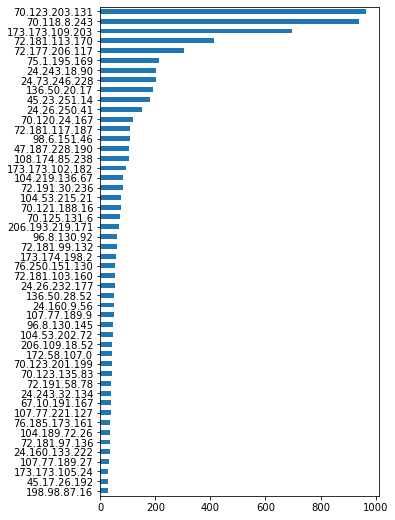

In [26]:
# some of the lower access ips visualized
lowest_access_ip = value_counts_and_frequencies(least_active_students_df.ip)
lowest_access_ip['count'].sort_values().tail(50).plot.barh(figsize=(5, 9))


#### We went ahead and checked the students that rarely access the curriculum when activive and found the following ip addresses. We ran the ips against a quality check website(https://www.ipqualityscore.com/ip-reputation-check/lookup/)  and these are the results


- 98.6.151.46        - 100% abusive and has reputation issues
- 72.181.117.187     - clean, however, black listed by certain companies
- 70.120.24.167      - clean, however, black listed by certain companies
- 97.105.90.179      - 65% suspicious black listed by certain companies
- 3.135.225.219      - 100% abusive and has reputation issues
- 45.131.192.190     - 100% abusive and has reputation issues
- 189.146.46.149     - not suspicious but the only one accessing from Mexico
- 64.250.227.83      - 65% suspicious black listed by certain companies
- 99.203.27.212      - 65% suspicious black listed by certain companies
- 95.181.238.34      - accesing from the the Bahamas

### _4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?_

- Typically bots that access sites for scraping once every 10 seconds, additionally having the same ip address access the same path at the same exact time consistently then it raises suspicion therefore roughly

#### Here we resampled the data by 1hr to measure traffic within the hour 

In [27]:
#resampling hourly data
ip_hourly = df_time.resample('h').ip.value_counts()
ip_hourly.tail()

date_time            ip             
2021-04-21 16:00:00  172.125.226.175    1
                     173.174.194.60     1
                     24.160.137.86      1
                     66.69.48.5         1
                     68.206.162.6       1
Name: ip, dtype: int64

#### Aproximate the number of times a bot might be scraping  per hour


In [28]:
# aproximately the number of times a bot might scrape per hour
suspicious = ip_hourly > 100

In [29]:
suspicious = suspicious.replace(False,"NaN")
suspicious = pd.DataFrame(suspicious)
suspicious = suspicious[suspicious.ip == True]
suspicious.rename(columns = {'ip':'suspicious_ips'},inplace = True)
suspicious = suspicious.reset_index()

In [30]:
suspicious.head()

,date_time,ip,suspicious_ips
0,2018-01-26 11:00:00,97.105.19.61,True
1,2018-01-29 09:00:00,97.105.19.61,True
2,2018-01-29 11:00:00,97.105.19.61,True
3,2018-01-30 09:00:00,97.105.19.61,True
4,2018-01-31 14:00:00,97.105.19.61,True


#### Each of the ip adresses below accessed the  data base more than 100 times an hr

In [31]:
suspicious.ip.value_counts()


97.105.19.58       921
97.105.19.61       146
192.171.117.210      4
72.128.136.219       3
172.124.70.146       2
71.150.217.33        1
70.125.137.220       1
104.190.242.24       1
104.238.45.6         1
172.124.67.93        1
70.117.31.136        1
108.65.244.91        1
67.10.166.10         1
72.177.174.24        1
204.44.112.76        1
173.173.121.126      1
70.130.123.81        1
Name: ip, dtype: int64

#### Below are the unique ips with high frequency access 

In [32]:
#unique ips that have high frequency 
unique_ips = pd.DataFrame(suspicious.ip.unique())
unique_ips

,0
0,97.105.19.61
1,108.65.244.91
2,97.105.19.58
3,192.171.117.210
4,173.173.121.126
5,204.44.112.76
6,72.177.174.24
7,67.10.166.10
8,70.117.31.136
9,172.124.70.146


#### It appears that these three ip addresses are from codeup and san antonio therefore no need for concern
- 97.105.19.58       
- 97.105.19.61       
- 192.171.117.210


#### This ip appears to be from Denton TX, mnight not be malicious but we will conduct further investigations if more time is presented
- 72.128.136.219

#### These are the ips that have a high probability of scraping, they have accessed the network atleast 100 times within a period of  one hour
- 172.124.70.146       
- 71.150.217.33        
- 70.125.137.220       
- 104.190.242.24       
- 104.238.45.6         
- 172.124.67.93        
- 70.117.31.136        
- 108.65.244.91        
- 67.10.166.10
- 72.177.174.24        
- 204.44.112.76        
- 173.173.121.126      
- 70.130.123.81 


### _5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?_

#### Acquiring Fresh Data:

In [33]:
#Getting the data from the database and caching it into a CSV:
df = get_db_log_data()

#wrangling Data:
df = wrangle.wrangle_df(df)

#Dropping Rows With Nulls:
df = df.dropna()

In [34]:
#Applying a function that creates a column that lists the type of program a student is in (it takes a while):
cross = df.apply(wrangle.program_type, 1)

#### Determining Crossover from Web Development to Data Science:

In [35]:
#Creating variables for web development and data science students:
web_students = cross[cross.program_type == 'web']
data_students = cross[cross.program_type == 'data']

In [36]:
#Setting earliest date to 12/31/18:
first_date = dt.datetime(2018, 12, 31)
#Setting latest date to 1/1/20:
second_date = dt.datetime(2020, 1, 1)

#Creating a DataFrame containing only records within above range:
web_dev_log = web_students[(web_students.date > first_date) & (web_students.date < second_date)]

In [37]:
#Searching for data science keywords in path name to identify some web dev courses for 2019, saving to web_crossover df:
web_crossover = web_dev_log[web_dev_log.path.str.contains('excel|Regression|mysql|Probability', regex=True, flags=re.IGNORECASE)]

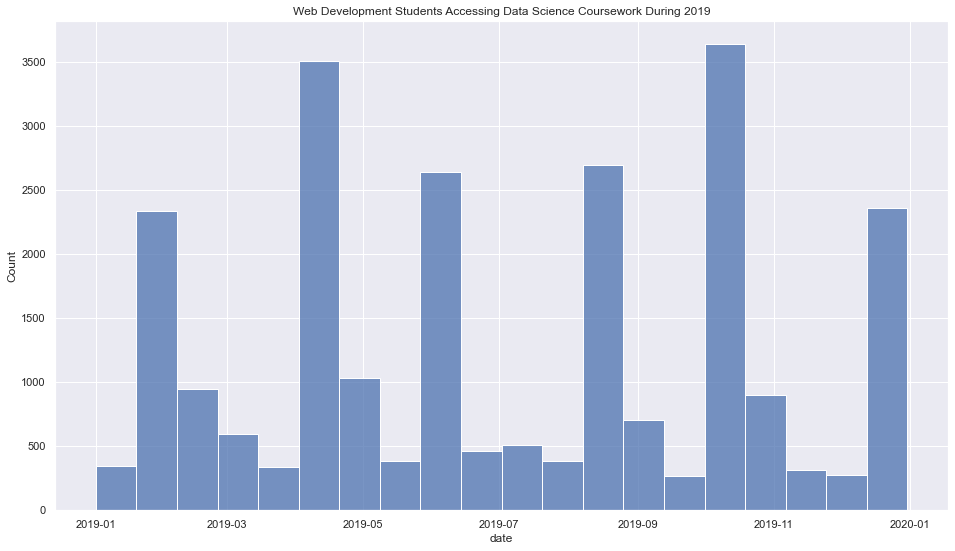

In [56]:
#This plot shows the web student access to data courses:
sns.histplot(data = web_crossover, x = 'date', bins = 20).set(title = 'Web Development Students Accessing Data Science Coursework During 2019')
sns.set(rc = {'figure.figsize':(16,9)});

This chart indicates that there isn't really any point in 2019 where the Web Development students lost their ability to access the Data Science curriculum. 

#### Determining Cross Over From Data Science to Web Development:

In [39]:
#Setting earliest date to 12/31/18:
first_date = dt.datetime(2018, 12, 31)
#Setting latest date to 1/1/20:
second_date = dt.datetime(2020, 1, 1)

#Creating a DataFrame containing only records within above range:
data_log = data_students[(data_students.date > first_date) & (data_students.date < second_date)]

In [40]:
#Searching for web development keywords in path name to identify some web dev courses for 2019, saving to data_crossover df:
data_crossover = data_log[data_log.path.str.contains('html|css|java|spring', regex=True, flags=re.IGNORECASE)]

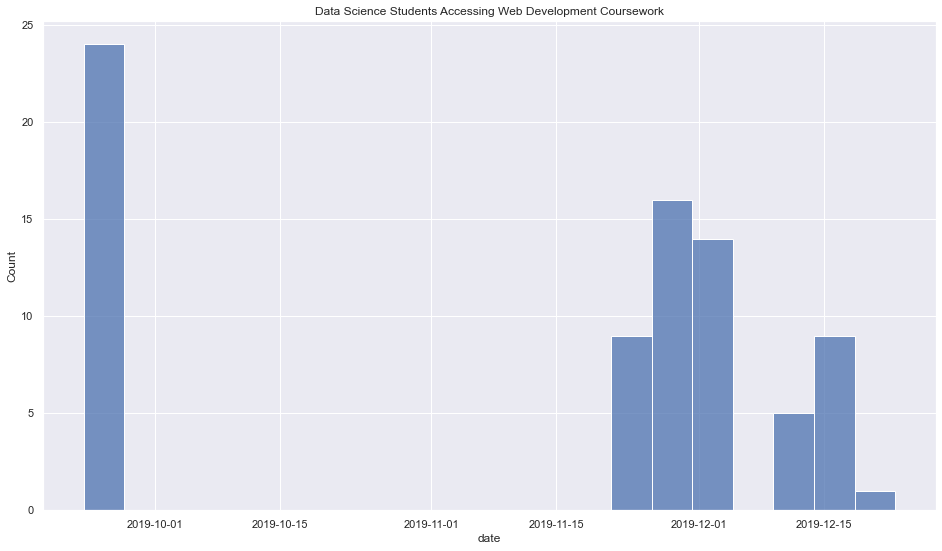

In [41]:
#This plot shows the data student access to web dev courses:
sns.histplot(data = data_crossover, x = 'date', bins = 20).set(title = 'Data Science Students Accessing Web Development Coursework')
sns.set(rc = {'figure.figsize':(16,9)});

This chart shows that Data Science students first accessed the Web Development curriculum in September and access remained possible through the end of the year, showing that the access wasn't revoked during 2019.

#### Determining Whether Access Had Been Restricted Before:

In [42]:
#Setting earliest date to 12/31/18:
earliest_date = dt.datetime(2017, 12, 31)
#Setting latest date to 1/1/20:
latest_date = dt.datetime(2022, 5, 1)

#Creating a DataFrame containing only records within above range:
web_dev_log2 = web_students[(web_students.date > earliest_date) & (web_students.date < latest_date)]

#Creating a DataFrame containing only Data Science records within above range:
data_log2 = data_students[(data_students.date > earliest_date) & (data_students.date < latest_date)]

In [43]:
#Searching for data science keywords in path name to identify some web dev courses for all dates, saving to web_crossover2:
web_crossover2 = web_dev_log2[web_dev_log2.path.str.contains('excel|Regression|mysql|Probability', regex=True, flags=re.IGNORECASE)]

In [44]:
#Searching for web development keywords in path name to identify some web dev courses for all dates, saving to data_crossover2:
data_crossover2 = data_log[data_log.path.str.contains('html|css|java|spring', regex=True, flags=re.IGNORECASE)]

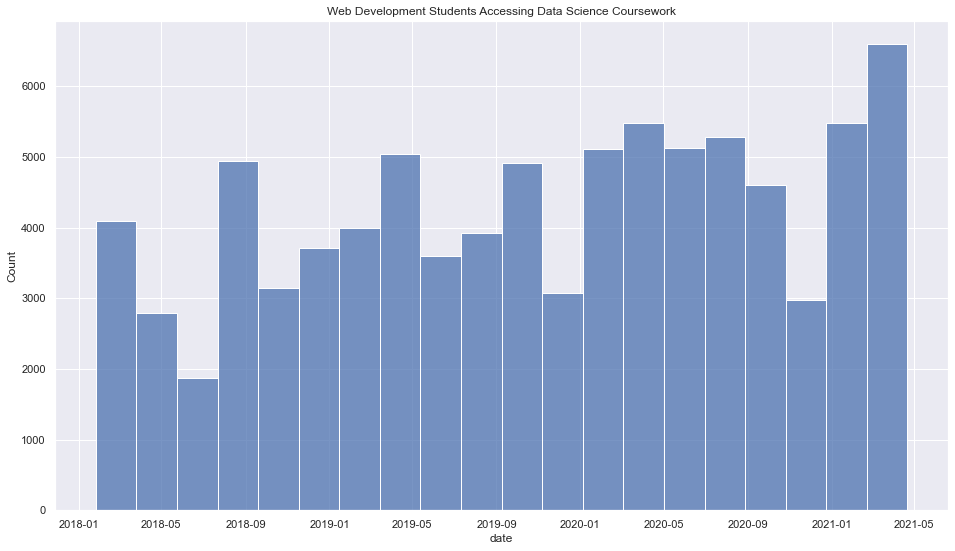

In [45]:
#This plot shows the web student access to data courses:
sns.histplot(data = web_crossover2, x = 'date', bins = 20).set(title = 'Web Development Students Accessing Data Science Coursework')
sns.set(rc = {'figure.figsize':(16,9)});

This chart shows that even over the course of the entire time window considered, there doesn't appear to be evidence to support that cross-curriculum access was meaningfully restricted.

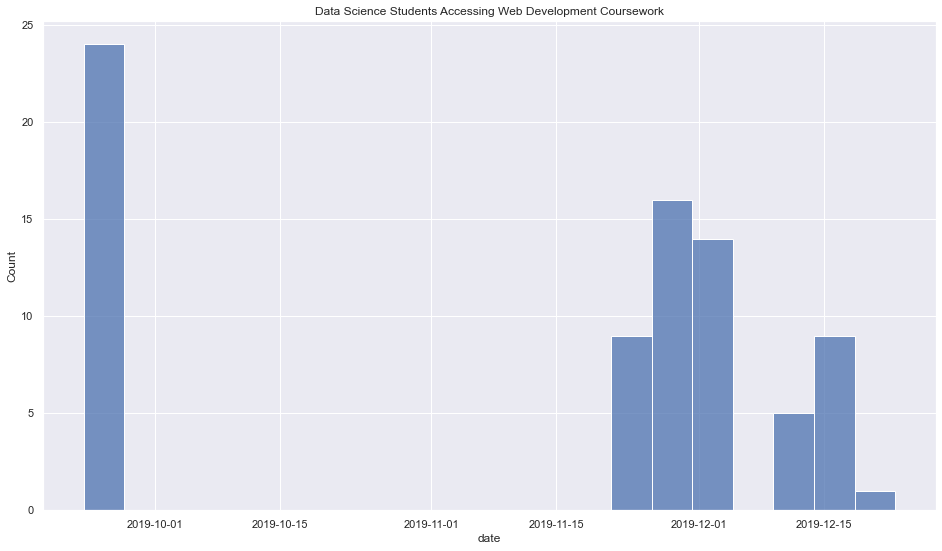

In [46]:
#This plot shows the web student access to data courses:
sns.histplot(data = data_crossover2, x = 'date', bins = 20).set(title = 'Data Science Students Accessing Web Development Coursework')
sns.set(rc = {'figure.figsize':(16,9)});

This chart shows that even over the course of the entire time window considered, there doesn't appear to be evidence to support that cross-curriculum access was meaningfully restricted.

### 7. Which lessons are least accessed?

What program_id's are there? What do we have to work with?

In [47]:
df.program_id.value_counts()

full_stack_java          713365
data_science             103411
full_stack_php            30548
front_end_programming         5
Name: program_id, dtype: int64

#### We know that Codeup has a Web Development course that includes front_end_programming, full_stack_java, and full_stack_php. Data Science has its own curriculum and doesn't look like it will be going under any other name. 

In [48]:
# Splitting the program ids into own dfs
web_dev = df[(df.program_id == 'full_stack_java') | (df.program_id == 'full_stack_php') | (df.program_id == 'front_end_programming')]
web_dev.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [49]:
# Data science dataframe
ds = df[df.program_id == 'data_science']
ds.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
326053,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58
326054,2019-08-20,09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326055,2019-08-20,09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59
326056,2019-08-20,09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:02
326057,2019-08-20,09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:08


#### Now that we have the dataframes split up, lets run a value count for the programs and put a tail on it so we can see what paths are used and how often.

In [50]:
#counting
web_dev.path.value_counts().tail(5)

4-stats/2.7-correlation                                         1
4-python/error-handling                                         1
10-anomaly-detection/isolation-forests                          1
10-anomaly-detection/time-series-anomaly-detection-part-3       1
appendix/professional-development/post-interview-review-form    1
Name: path, dtype: int64

#### Viusalize

In [51]:
# shows how many unique paths are there. That's ALOT and way bigger of a number than we can provide in a few sentences.
#### Lets just look at a few to get an idea
plot_web = web_dev.groupby('path').filter(lambda x : len(x)>100)
plot_web.path.nunique()

307

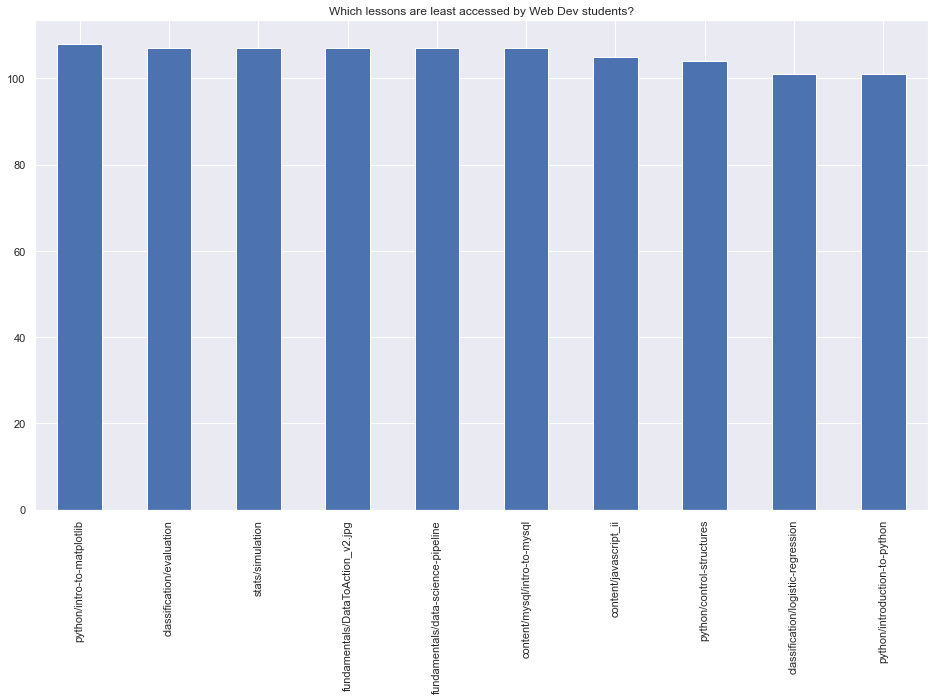

In [52]:
# Visualize 
plot_web['path'].value_counts().tail(10).plot(kind='bar')
plt.title('Which lessons are least accessed by Web Dev students?')
plt.show()

In [53]:
# lets look at the same things, but for data science now
ds.path.value_counts().tail(5)

python/custom-sorting-functions            1
imports                                    1
java-i/console-io                          1
appendix/univariate_regression_in_excel    1
6-regression/8-Project                     1
Name: path, dtype: int64

In [54]:
# how many unique paths
plot_ds = ds.groupby('path').filter(lambda x : len(x)>100)
plot_ds.path.nunique()

263

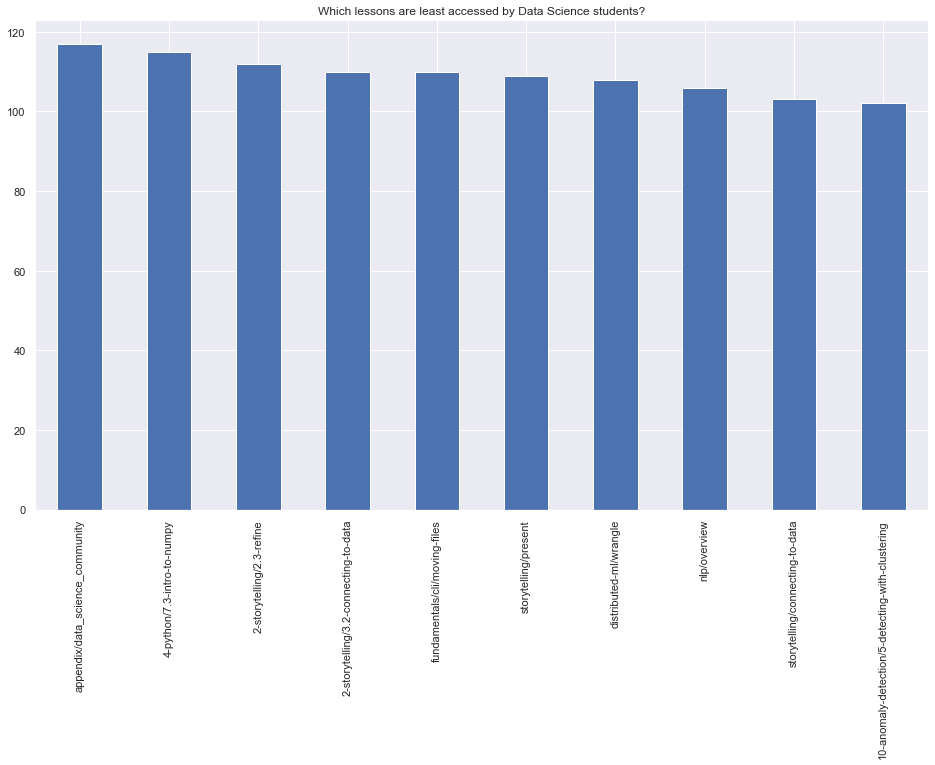

In [55]:
plot_ds['path'].value_counts().tail(10).plot(kind='bar')
plt.title('Which lessons are least accessed by Data Science students?')
plt.show()

### Summary:
In total, we had alot of unique paths for both programs, and the amount of paths that were accessed a minimum time of once was over ten per program. Since an answer that large is not reliable, I decided to pick 5 from each program.

<b>Data Science least accessed:</b>

    - python/custom-sorting-functions            
    - imports                                    
    - java-i/console-io                          
    - appendix/univariate_regression_in_excel    
    - 6-regression/8-Project
    
<b> Web Development least accessed:</b>

    - 4-stats/2.7-correlation                                         
    - 4-python/error-handling                                         
    - 10-anomaly-detection/isolation-forests                          
    - 10-anomaly-detection/time-series-anomaly-detection-part-3       
    - appendix/professional-development/post-interview-review-form